<img src="../imgs/Adevinta-ULPGC-logo.jpg" width="530px" align="right">

# **Tutorial de Pytorch 2: Autograd**


## Autograd: Derivación automática

La **derivación automática** es la pieza clave del proceso de aprendizaje de cualquier red neuronal. Con PyTorch podemos construir cualquier función (modelo) que necesitemos basada en operaciones sobre tensores. Además del modelo añadiremos una **función de pérdida** por la que podremos descender por el gradiente con el fin de aproximarnos a algún mínimo. PyTorch nos ofrece la posibilidad de generar automáticamente estos gradientes (vectores de descenso).

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Vamos a derivar una función sencilla como:

$$ y = x^2 + 3x^3$$ 

Sabemos que su derivada es:

$$ y' = 2x + 9x^2$$

Si queremos saber cuál es el valor de la derivada en $x=2$, podemos calcularlo. Su valor es $y'(2) = 40$. Vamos a implementarlo en PyTorch:

In [2]:
import torch
import numpy as np

x = torch.from_numpy(np.array([2.]))  # Creamos un tensor con un solo valor (2.0)
x.requires_grad_(True)  # Especificamos que 'x' es una variable sobre la que queremos derivar

y = x**2 + 3*x**3  # Creamos la expresión

y.backward()  # Solicitamos a PyTorch que derive 

print(x.grad)  # Imprimimos la derivada o gradiente sobre 'x'

tensor([40.], dtype=torch.float64)


¿Qué pasa si tenemos una función de más de una variable? Como por ejemplo:

$$ z = 4x^2 + 2y^3 + y$$

Ocurre que pasamos de **derivar** a **derivar parcialmente**. Esto significa que debemos derivar primero con respecto a $x$ y luego con respecto a $y$.

$$ \frac{\partial{z}}{\partial{x}} = 8x $$

$$ \frac{\partial{z}}{\partial{y}} = 6y^2 + 1 $$

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x = torch.from_numpy(np.array([2])).float().to(device)
y = torch.from_numpy(np.array([3])).float().to(device)
x.requires_grad_(True)
y.requires_grad_(True)

z = (4*x**2 + 2*y**3 + y)

z.backward()

print(x.grad)
print(y.grad)

tensor([16.], device='cuda:0')
tensor([55.], device='cuda:0')


Vamos un paso más allá y veamos cómo podríamos tener un número arbitrario de variables a derivar y cómo lo podríamos representar de manera matricial.

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X = torch.from_numpy(np.array([[2,3],[4,5]])).float().to(device)

X.requires_grad_(True)

Y = torch.sum(X**2)  # La potenciación actúa sobre cada elemento de la matriz

Y.backward()

print(X.grad)

tensor([[ 4.,  6.],
        [ 8., 10.]], device='cuda:0')


Lo anterior expresa que tenemos una matriz de variables de $2\times2$, elevamos cada celda al cuadrado y sumamos todo. Escrito de otra forma:
$$ X = \left( \begin{array}{cc} a & b \\ c & d \end{array} \right) $$

$$ Y = a^2 + b^2 + c^2 + d^2 $$

$$ Y' = \left( \begin{array}{cc} \frac{\partial Y}{\partial a} & \frac{\partial Y}{\partial b} \\ \frac{\partial Y}{\partial c} & \frac{\partial Y}{\partial d} \end{array} \right) = \left( \begin{array}{cc} 2a & 2b \\ 2c & 2d \end{array} \right)$$

## Grafo de computación dinámico

tensor([40.], dtype=torch.float64)


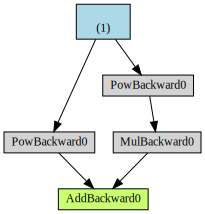

In [5]:
import os
os.environ['PATH'] += os.pathsep + "C:\\Program Files\\Graphviz 2.44.1\\bin"

import torch
import torchviz
import numpy as np

x = torch.from_numpy(np.array([2.]))  # Creamos un tensor con un solo valor (2.0)
x.requires_grad_(True)  # Especificamos que 'x' es una variable sobre la que queremos derivar

y = x**2 + 3*x**3  # Creamos la expresión

y.backward()  # Solicitamos a PyTorch que derive 

print(x.grad)  # Imprimimos la derivada o gradiente sobre 'x'

torchviz.make_dot(y)

Veamos qué significa esto:

- **Cajas azules:** son los tensores que usamos como parámetros.
- **Cajas grises:** operaciones relativas a la computación del gradiente o sus dependencias.
- **Cajas verdes:** corresponde al punto de partida sobre el que se calcula el gradiente.

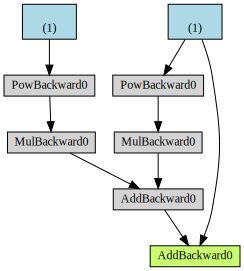

In [6]:
x = torch.from_numpy(np.array([2.]))
y = torch.from_numpy(np.array([3.]))
x.requires_grad_(True)
y.requires_grad_(True)

z = (4*x**2 + 2*y**3 + y)

z.backward()

torchviz.make_dot(z)

tensor([[ 4.,  6.],
        [ 8., 10.],
        [12., 14.]])


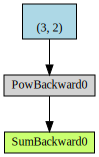

In [7]:
X = torch.from_numpy(np.array([[2,3],[4,5],[6,7]])).float()

X.requires_grad_(True)

Y = torch.sum(X**2)  # La potenciación actúa sobre cada elemento de la matriz

Y.backward()

print(X.grad)

torchviz.make_dot(Y)

#### Instalación en Windows.
- Instalar GraphViz (graphviz-install-2.44.1-win64.exe)
- ¿pip install graphviz
- pip install torchviz?
- Ejecuta en una terminal en modo administrador: dot -c